<a href="https://colab.research.google.com/github/Rodrigo-O-Santos/Projects/blob/master/Airbnb_Hong_Kong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="http://sigmoidal.ai/wp-content/uploads/2019/08/logo_color.png" height="40px"></center>

# Análise dos Dados do Airbnb - Hong Kong

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

Em pesquisa ao site [GPC - Global Property Guide](https://www.globalpropertyguide.com/most-expensive-cities), podemos verificar que Hong Kong possui o metro quadrado mais caro do mundo seguido de Londres (aluguel/mês):

Hong Kong - $ 7,267

Londres - $ 6,388
<center><img src = "https://seeklogo.com/images/F/flag-map-of-hong-kong-logo-C9ADBD56BD-seeklogo.com.png" height = "100px"></center>

**Neste *notebook*, iremos analisar os dados do Airbnb, referentes à cidade de Honk Kong, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados
Todos os dados obtidos para esta análise foram obtidos do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise, foi extraído um arquivo do site citado:
* `listings.csv` - *Summary information and metrics for listings in Hong Kong (good for visualisations).*



In [0]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/china/hk/hong-kong/2020-03-17/visualisations/listings.csv")

## Análise dos Dados
 

O objetivo é mostrar como os dados extraídos anteriormente estão estruturados. 

**Hong Kong** possui aproxidamente 7.5 milhões de habitantes (dados de 2018) e possui um forte turismo que representa cerca de 5% PIB (14º destino mais popular). Em 2016 foram 26.6 milhões de visitantes contribuindo com $32.9 bilhões na economia. Porém, perceba que temos poucos bairros oferecendo o serviço de hospedagem pelo Airbnb: apenas 18.

Como comparação, o Rio de Janeiro que é a cidade que mais recebe turista no Brasil, possui aproximadamente 6.6 milhões de habitantes (dados de 2015) e recebeu em 2016, aproxidamente, 6.5 milhoes de turistas, possui 51* bairros com o serviço de hospedagem pelo Airbnb.

***Dados retirados do mesmo site do Airbnb, referente a cidade do Rio de Janeiro**

**Dicionário das variáveis**

* `id` - número gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número que identifica o proprietário do imóvel
* `host_name` - nome do proprietário
* `neighbourhood_group` - coluna não possui nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada de latitude da propriedade
* `longitude` - coordenada de longitude da propriedade
* `room_type` - tipo de imóvel ofertado (quarto, apt inteiro, casa)
*	`price` - preço cobrado pela diária
*	`minimum_nights` - mínimo de noites necessárias para alugar o imóvel
*	`number_of_reviews` - números de análises que a propriedade possui
*	`last_review` - data da última análise feita
*	`reviews_per_month` - análises recebidas por mês
*	`calculated_host_listings_count` - número de imóveis do mesmo proprietário
*	`availability_365` - número de dias disponíveis (considerando 365 dias)


Antes de iniciar qualquer análise, vamos analisar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

Na sequência, vamos verificar quais os bairros de Hong Kong possuem imóveis disponíveis para aluguel pelo Airbnb.

In [0]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,69074,Beautiful oasis of plants & art @ best location,160139,Amy,NaN,Central & Western,22.28352,114.15018,Entire home/apt,1398,3,133,2019-10-05,1.20,1,174
1,103760,Central Centre 5 min walk to/from Central MTR,304876,Brend,NaN,Central & Western,22.28407,114.15570,Entire home/apt,847,2,269,2020-01-25,2.53,12,360
2,132773,Fabulous 2 Bdrm Aprt Open kitchen,304876,Brend,NaN,Central & Western,22.28868,114.14494,Entire home/apt,1048,2,303,2020-02-21,2.87,12,342
3,133390,"Soho, Hong Kong 1 bedroom flat",654642,Robin,NaN,Central & Western,22.28343,114.15539,Entire home/apt,932,2,27,2015-06-30,0.25,1,44
4,163664,Soho off Hollywood Road P4,304876,Brend,NaN,Central & Western,22.28651,114.14874,Entire home/apt,691,2,221,2020-01-31,2.12,12,356


In [0]:
# mostrar os bairros com imóveis para alugar no Airbnb
df['neighbourhood'].unique()

array(['Central & Western', 'Yau Tsim Mong', 'Wan Chai', 'Yuen Long',
       'Southern', 'Eastern', 'Islands', 'Kowloon City', 'Kwai Tsing',
       'North', 'Sha Tin', 'Sham Shui Po', 'Tuen Mun', 'Sai Kung',
       'Wong Tai Sin', 'Tai Po', 'Tsuen Wan', 'Kwun Tong'], dtype=object)

In [0]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos verificar quais e quantos são os tipos de dados diferentes que teremos para análise neste conjunto de dados.
Vamos ver também o tipo de cada coluna.



In [0]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 11773
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Para que não tenhamos uma análise influenciada de forma negativa por um número excessivo de valores ausentes no *dataset*.
Sendo assim, é importante detectarmos se existe e qual o tamanho dos valores ausentes em nosso conjunto de dados.

Podemos perceber que:
* a coluna **neighbourhood_group** possui 100% dos dados nulos;
* as colunas **reviews_per_month** e **last_review** possuem cerca de 35% dos dados nulos;
* a coluna **name** possui menos de 1% dos dados nulos. 

In [0]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.00000
reviews_per_month                 0.35454
last_review                       0.35454
name                              0.00068
availability_365                  0.00000
calculated_host_listings_count    0.00000
number_of_reviews                 0.00000
minimum_nights                    0.00000
price                             0.00000
room_type                         0.00000
longitude                         0.00000
latitude                          0.00000
neighbourhood                     0.00000
host_name                         0.00000
host_id                           0.00000
id                                0.00000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 
Iremos verificar como está a distribuição das variáveis numéricas plotando um histograma.

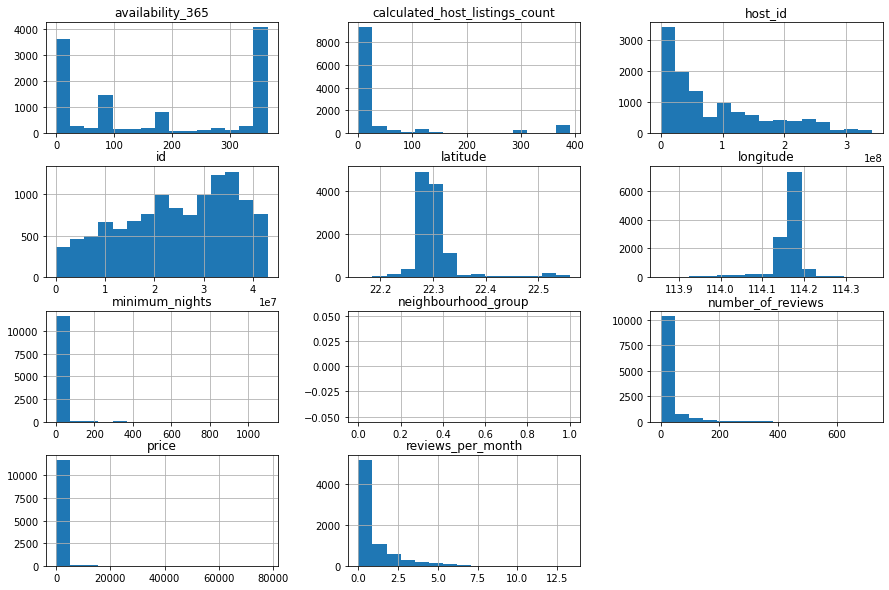

In [0]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**
Podemos perceber pelos histogramas plotados que existem indícios de *outliers*.
Veja por exemplo, a variável **minimum_nights**: existem imóveis com a necessidade de reserva de no mínimo 1000 dias, o que corresponde a quase 3 anos.

Veja ainda que alguns gráficos como **price**, **reviews_per_month**, **number_of_reviews** também distorcem o gráfico, não seguindo uma distribuição "comum".

* Para estudarmos os *outliers* iremos verificar o resumo estatístico e *plotar* um gráfico do tipo boxplot das variáveis numéricas.

In [0]:
# Ver o resumo estatístico das variáveis numéricas
df[['availability_365', 'calculated_host_listings_count', 'minimum_nights', 'number_of_reviews', 'price']].describe()

,availability_365,calculated_host_listings_count,minimum_nights,number_of_reviews,price
count,11773.000000,11773.000000,11773.000000,11773.000000,11773.000000
mean,177.156205,44.445171,9.392763,18.284125,748.366771
std,155.328153,101.286743,27.745797,41.218675,1932.688382
min,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,303.000000
50%,158.000000,4.000000,2.000000,2.000000,489.000000
75%,364.000000,18.000000,6.000000,15.000000,800.000000
max,365.000000,390.000000,1100.000000,720.000000,77998.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A quantidade mínima de noite (`minimum_nights`) está muito acima de um número normal, chegando a 1100 dias (aprox 3 anos);
* O preço possui um valor médio de 748, com 75% dos imóveis até 800. Porém seu valor máximo chega a 77,998;
* O número de imóveis do mesmo dono chega a 390, bem acima dos 18 que representam 75% em nosso *dataset*.

Estes números excessivamente fora do comum representam `outliers` e devem ser retirados da nossa análise para não distorcer os dados estudados.

### Boxplot para *minimum_nights*

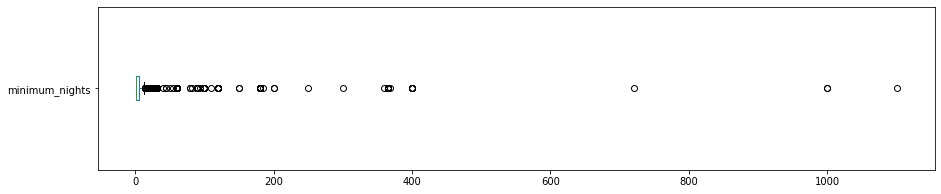

minimum_nights com valores acima de 30 dias:
302 entradas
2.5652%


In [0]:
# minimum_nights
df.minimum_nights.plot(kind = 'box', vert = False, figsize = (15, 3));
plt.show()

# ver quantidade de valores acima de 30 dias
print("minimum_nights com valores acima de 30 dias:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0]) * 100))

### Boxplot para *price*

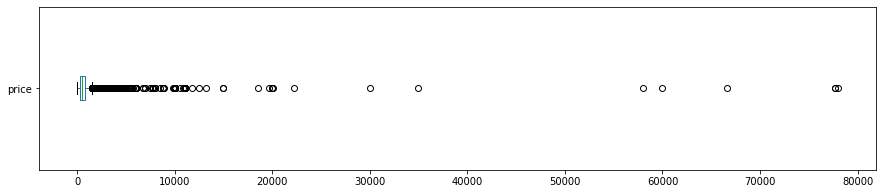

price com valores acima de 2000:
427 entradas
3.6269%


In [0]:
# price
df.price.plot(kind = 'box', vert = False, figsize = (15, 3));
plt.show()

# ver quantidade de valores acima de 2000
print("price com valores acima de 2000:")
print("{} entradas".format(len(df[df.price > 2000])))
print("{:.4f}%".format((len(df[df.price > 2000]) / df.shape[0]) * 100))

###Boxplot para *calculated_host_listings_count*

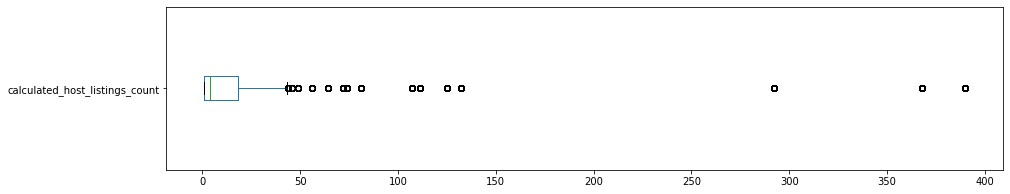

calculated_host_listings_count acima de 100:
1525 entradas
12.9534%


In [0]:
# calculated_host_listings_count
df.calculated_host_listings_count.plot(kind = 'box', vert = False, figsize = (15,3));
plt.show()

# Ver quantidade de valores acima de 100
print("calculated_host_listings_count acima de 100:")
print("{} entradas".format(len(df[df.calculated_host_listings_count > 100])))
print("{:.4f}%".format((len(df[df.calculated_host_listings_count > 100]) / df.shape[0]) * 100))

### Histogramas sem outliers
Uma vez identificados *outliers*, vamos limpar nossa *DataFrame*, retirando os dados que não nos interessa, e plotar novo histograma. 

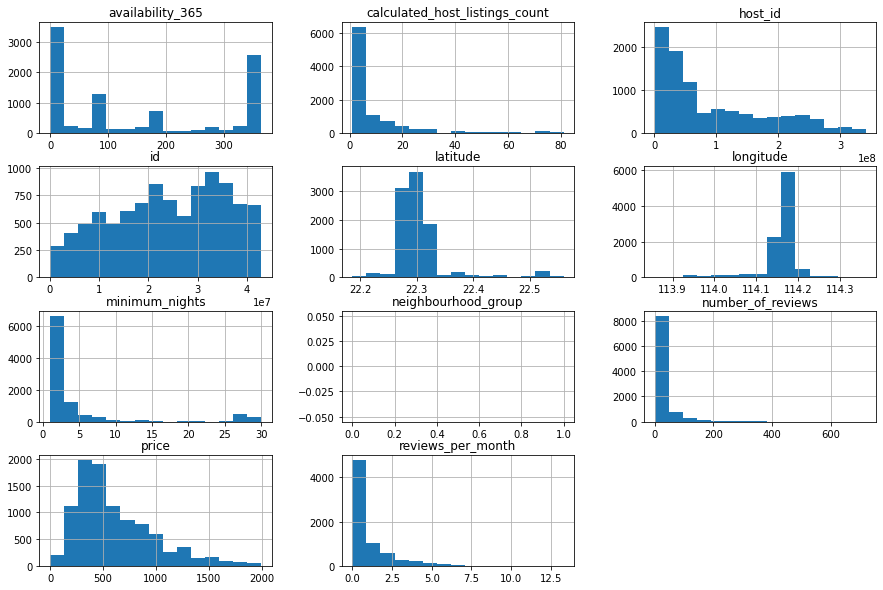

In [0]:
# Remover os *outliers* em um novo *DataFrame*
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 2000].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean.calculated_host_listings_count > 100].index, axis = 0, inplace = True)

# Remover `neighbourhood_group`pois está vazio


# Plotar os histogramas das variáveis numéricas
df_clean.hist(bins = 15, figsize = (15,10));

Podemos ver nos gráficos colocados lado a lado, como limpar os *outliers* deixando apenas os dados que fazem sentido, faz diferença na análise dos mesmos.

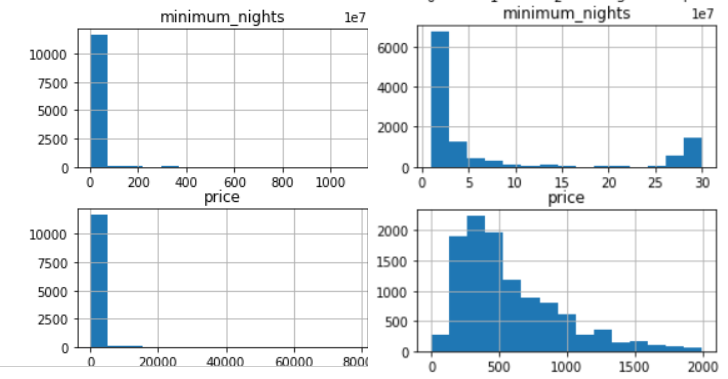

### **Q4. Qual a correlação existente entre as variáveis**
Vamos verificar quais dados possuem correlação, ou seja, ver se temos 2 variáveis com comportamentos relacionados entre si.
Para isso vamos:
* Criar uma matriz de correlação;
* Criar um *heatmap*, usando a biblioteca `seaborn`.

In [0]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

# mostrar a matriz de correlação


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.052559,0.000173,-0.009965,-0.179425,-0.082330
minimum_nights,-0.052559,1.000000,-0.104374,-0.113631,0.182815,0.145149
number_of_reviews,0.000173,-0.104374,1.000000,0.801945,0.022481,0.087176
reviews_per_month,-0.009965,-0.113631,0.801945,1.000000,0.015088,0.073501
calculated_host_listings_count,-0.179425,0.182815,0.022481,0.015088,1.000000,0.367411
availability_365,-0.082330,0.145149,0.087176,0.073501,0.367411,1.000000


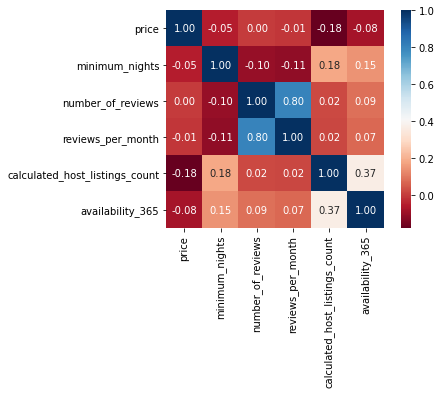

In [0]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap = 'RdBu', fmt = '.2f', square = True, linecolor = 'White', annot = True);

Podemos ver com o *heatmap* que a maior correlação existente é número de reviews com reviews por mês.
Esta é uma relação até óbvia já que, quanto maior o número de reviews por mês, maior será o número dos mesmos.

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**
Vamos verificar qual tipo de imóvel é mais alugado pelo Airbnb em Hong Kong: apartamento inteiro, quarto inteiro, casa dividida...

In [0]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    4640
Private room       4361
Shared room         466
Hotel room          232
Name: room_type, dtype: int64

In [0]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.478400
Private room       0.449634
Shared room        0.048046
Hotel room         0.023920
Name: room_type, dtype: float64

Podemos ver que o imóvel inteiro e quarto privado representam mais de 90% dos imóveis disponíveis em Hong Kong.

### **Q6. Qual a localidade mais cara do dataset?**



In [0]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending = False)[:10]

neighbourhood
Southern             808.848101
Kwai Tsing           777.756757
Central & Western    749.318291
Islands              717.933036
Wan Chai             659.348366
Tsuen Wan            647.560000
Kowloon City         600.215339
Wong Tai Sin         591.217391
Eastern              590.298413
Kwun Tong            587.339623
Name: price, dtype: float64

Podemos verificar acima que Kowloon City, um dos bairros mais populosos, baratos e perigosos possui os mais caros imóvies para aluguel no Airbnb.

Vamos analisar quantas entradas temos para este bairro.

In [0]:
print(df[df.neighbourhood == 'Kowloon City'].shape)
df[df.neighbourhood == 'Kowloon City']

print('Média de listagens por Bairro:', df_clean.neighbourhood.value_counts().mean())
df_clean.neighbourhood.value_counts()

(482, 16)
Média de listagens por Bairro: 538.8333333333334


Yau Tsim Mong        3831
Central & Western    2083
Wan Chai             1530
Islands               448
Kowloon City          339
Eastern               315
Yuen Long             201
Sham Shui Po          183
North                 171
Sai Kung              143
Sha Tin               117
Southern               79
Kwun Tong              53
Tai Po                 50
Tsuen Wan              50
Tuen Mun               46
Kwai Tsing             37
Wong Tai Sin           23
Name: neighbourhood, dtype: int64

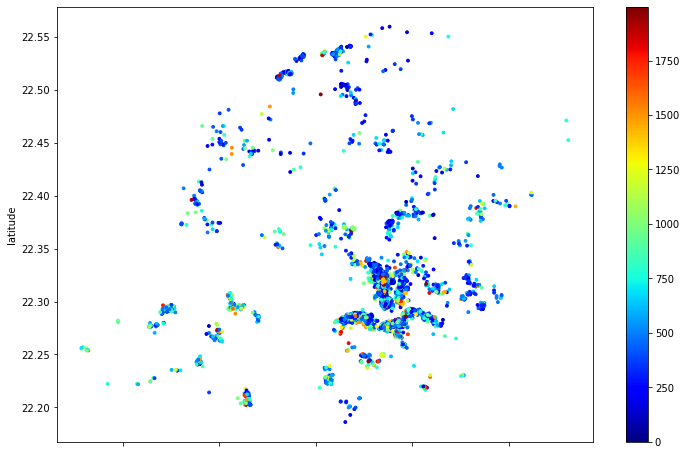

In [0]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind = "scatter", x = 'longitude', y = 'latitude', alpha = 10, c = df_clean['price'], s = 8, cmap = plt.get_cmap('jet'), figsize = (12, 8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [0]:
# ver a média da coluna `minimum_nights``
df_clean.groupby(['neighbourhood']).minimum_nights.mean().sort_values(ascending = False)

neighbourhood
Wong Tai Sin         7.826087
Wan Chai             6.771242
Eastern              6.190476
Sham Shui Po         6.120219
Kwun Tong            6.037736
Tuen Mun             5.913043
Tsuen Wan            5.140000
Sha Tin              4.897436
Islands              4.747768
Kowloon City         4.678466
Central & Western    4.211234
Sai Kung             4.000000
Yau Tsim Mong        3.671365
Southern             3.430380
Kwai Tsing           3.162162
Tai Po               3.140000
Yuen Long            2.606965
North                1.532164
Name: minimum_nights, dtype: float64

## Conclusões


Após breve análise, podemos ver que existem muitos *outliers* no conjunto de dados, o que pode alterar significativamente nossos estudos.
Podemos notar que Hong Kong possui poucos imóveis disponíveis e que, os mesmos estão concentrados em uma determinada região (principalmente em 3 bairros), onde também estão os mais caros e exigem menor número de noites mínimas para reserva.